In [1]:
from phase_portrait import *
%matplotlib inline

In [2]:
data_snp= pd.read_csv('S&P500_Yahoo.csv')
#Выбираем нужные столбцы
data_snp=data_snp[['Date', 'Adj Close']]
data_snp.columns=['date', 'value']
data_snp['date']= pd.to_datetime(data_snp['date'], format='%Y-%m-%d')
data_snp

,date,value
0,1990-01-02,359.690002
1,1990-01-03,358.760010
2,1990-01-04,355.670013
3,1990-01-05,352.200012
4,1990-01-08,353.790009
...,...,...
8026,2021-11-08,4701.700195
8027,2021-11-09,4685.250000
8028,2021-11-10,4646.709961
8029,2021-11-11,4649.270020


In [3]:
data_nas= pd.read_csv('Nasdaq_compose_Yahoo.csv')

#Выбираем нужные столбцы
data_nas=data_nas[['Date', 'Adj Close']]
data_nas.columns=['date', 'value']
data_nas['date']= pd.to_datetime(data_nas['date'], format='%Y-%m-%d')
data_nas

,date,value
0,1990-01-02,459.299988
1,1990-01-03,460.899994
2,1990-01-04,459.399994
3,1990-01-05,458.200012
4,1990-01-08,458.700012
...,...,...
8026,2021-11-08,15982.360352
8027,2021-11-09,15886.540039
8028,2021-11-10,15622.709961
8029,2021-11-11,15704.280273


In [4]:
normalize_date=''
snp_phases=generate_phase_portrait(data_snp, [1, 7, 30])
nas_phases=generate_phase_portrait(data_nas, [1, 7, 30])

In [65]:
s_deriv=snp_phases[2][3]
n_deriv=nas_phases[2][3]

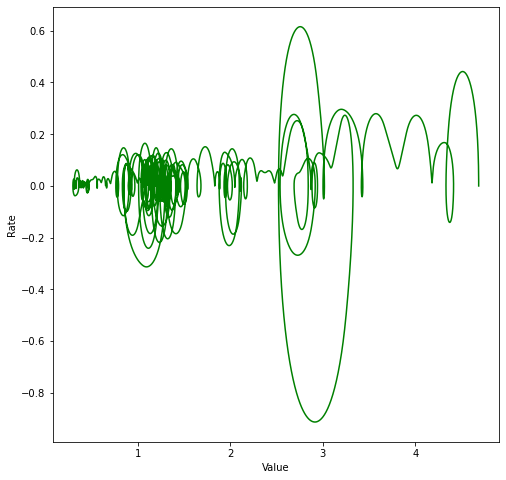

In [67]:
fig, ax = plt.subplots()
# ax.scatter(deriv[0], deriv[1], c=c_bar, s=0.05)
# ax.plot(s_deriv[0], s_deriv[1], '-g', n_deriv[0], n_deriv[1], ':r')
ax.plot(s_deriv[0], s_deriv[1], '-g')

# ax.plot(s_deriv[0][::30], s_deriv[1][::30], '-g')

#     ax.annotate(dates.iloc[-1].strftime('%d.%m.%y'), xy=(deriv[0][-1], deriv[1][-1]), color='black', ha="right")
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

# plt.title('Сравнение показателей, нормализованных на 01.01.2000')
# plt.legend(['S&P 500', 'NASDAQ Composite'], loc='best')

fig.set_figheight(8)
fig.set_figwidth(8)

# plt.savefig(f"Comparison_SnP_Nas_t30.png", dpi=200)

In [7]:
s_x, s_y=snp_phases[2][0:2]
n_x, n_y=nas_phases[2][0:2]

In [8]:
pd.concat([s_y.to_frame(), n_y.to_frame()], axis=1).corr()

,value,value
value,1.000000,0.980306
value,0.980306,1.000000


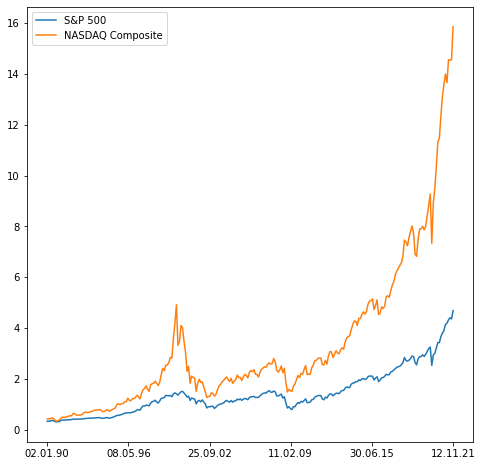

In [9]:
start_date='01.01.1995'
end_date='01.01.2002'

fig, ax = plt.subplots()
ax.plot(s_x, s_y, '-', n_x, n_y, '')
plt.legend(['S&P 500', 'NASDAQ Composite'], loc='best')
ticks_num=6
plt.xticks(ticks=get_ticks(snp_phases[2][2], ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
# plt.savefig(f"Comparison_SnP_Nas_t30_chart.png", dpi=200)
ax.plot()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.show()

In [9]:
# def test(dates, snp_phases):
#     x, y, xx, deriv, tt, slice_period=snp_phases[2]
#     y_lim=(-2700, 2500)
#     x_lim=(0, 16500)
#     deriv=list(map(lambda x: x*1000, deriv))
#     plot_phase_portrait(xx, dates, deriv, tt, 'test', y_limits=y_lim, x_limits=x_lim)
# test(data_nas['date'], nas_phases)

In [110]:
from itertools import chain
y_lims=list(chain(*[(min(slice_data[3][1]), max(slice_data[3][1])) for slice_data in nas_phases]))
# y_lims=tuple(map(np.ceil,(min(y_lims), max(y_lims))))
# y_lim=(-2.7, 2.5)
# x_lim=(0, 268)
y_lims

[-1.3107661824816597,
 1.0066197352039754,
 -1.5232966388415696,
 1.1748657067326296,
 -2.535345418168563,
 2.2268084080401374]

Wall time: 5min 8s


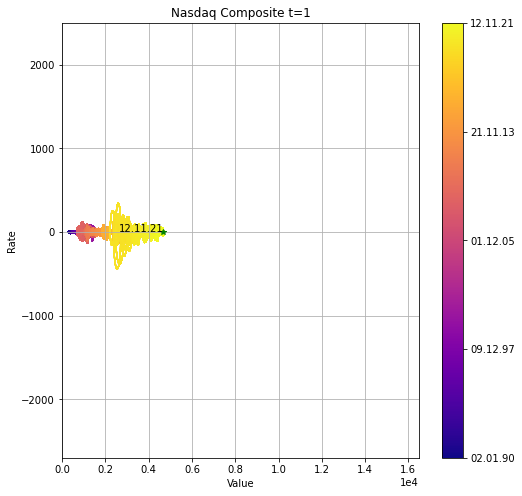

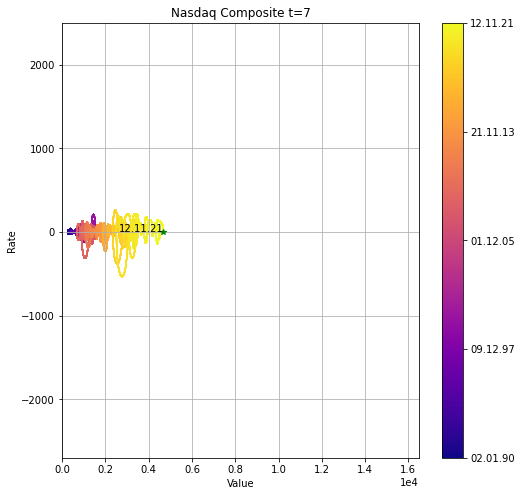

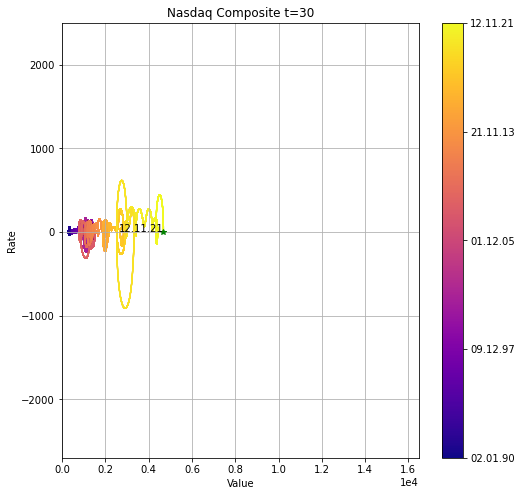

In [15]:
%time generate_png('./S&P500/', 'S&P500', data_snp, snp_phases, y_lim=(-1000, 700), x_lim=(0, 5000), upscale=1000)

Wall time: 4min 50s


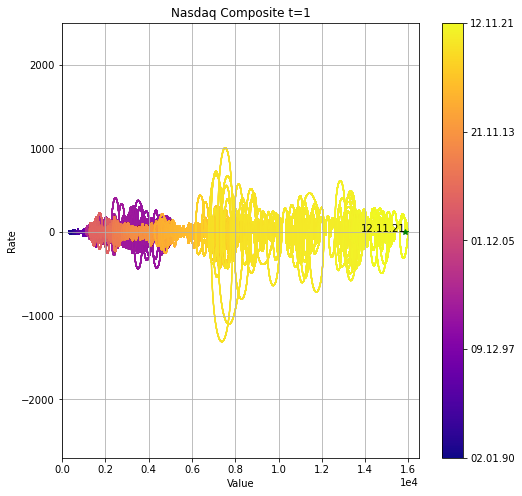

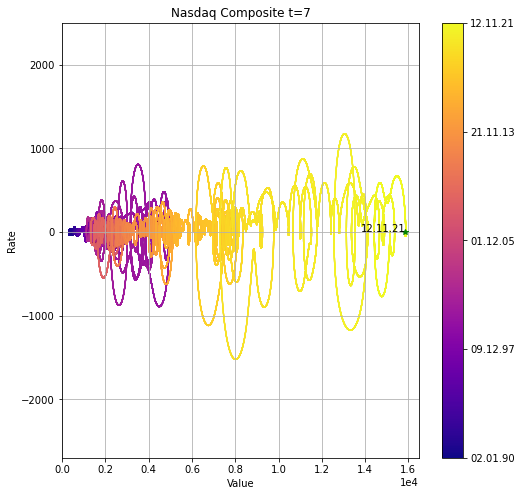

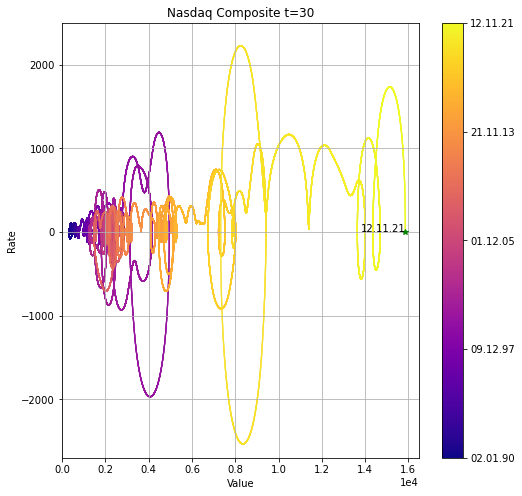

In [16]:
%time generate_png('./Nasdaq/', 'Nasdaq Composite', data_nas, nas_phases, y_lim=(-2700, 2500), x_lim=(0, 16500), upscale=1000)

In [32]:
def test(dates, snp_phases):
    x, y, xx, deriv, tt, slice_period, dates=snp_phases[2]
    start_date='01.01.1995'
    end_date='01.01.2002'
    return get_mask_tt(x, tt, dates,start_date, end_date)
mask=test(data_nas['date'], nas_phases)

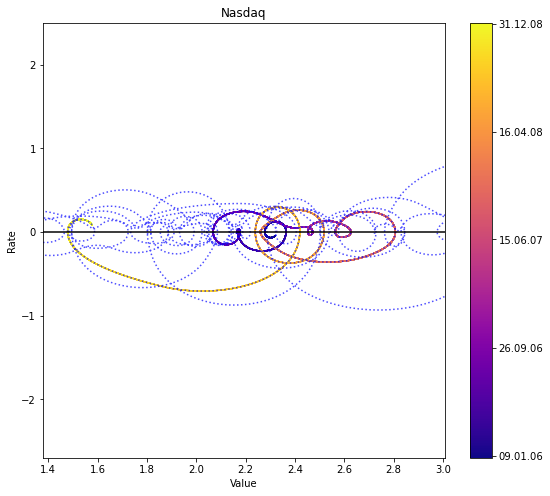

In [58]:
x, y, xx, deriv, tt, slice_period, dates=nas_phases[2]
start_date1='01.01.2006'
end_date1='01.01.2009'
mask_00 = get_mask_tt(x, tt, dates, start_date1, end_date1)

# start_date2='01.01.2006'
# end_date2='01.01.2008'
# mask_08 = get_mask_tt(x, tt, dates, start_date2, end_date2)


fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot(deriv[0], deriv[1], ':b', alpha=0.7)
# line2, =ax.plot( deriv[0][mask_00], deriv[1][mask_00], '-r', label=f"{start_date1}-{end_date1}")
# line3, =ax.plot( deriv[0][mask_08], deriv[1][mask_08], '-g', label=f"{start_date2}-{end_date2}")

###################################
cmap = plt.cm.plasma
norm = plt.Normalize(tt[mask_00].min()-0.1, tt[mask_00].max()) #-0.1 это костыль тк мин значение больше на сотые доли
# c_bar=cmap(norm)
c_bar=plt.cm.plasma(np.linspace(0, 1, tt[mask_00].shape[0]))

m_dates = get_dates_mask(dates, start_date1, end_date1)
m_xx = get_mask_tt(x, xx, dates, start_date1, end_date1)

ax.scatter(deriv[0][mask_00], deriv[1][mask_00], c=c_bar, s=0.1)

ticks_num = 5
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ticks=get_ticks(xx[m_xx], ticks_num), orientation='vertical')
cbar.ax.set_yticklabels(map(lambda x: x.strftime('%d.%m.%y'), get_ticks(dates[m_dates], ticks_num)))
###################################


plt.title('Nasdaq')
ax.set_ylabel('Rate')
ax.set_xlabel('Value')
# plt.legend(handles=[line2], loc='best') #, line3

# plt.legend(['t=1', 't=7', 't=30' ], loc='best')
plt.xlim((deriv[0][mask_00].min()-0.1, deriv[0][mask_00].max()+0.2))
ax.set_ylim([-2.7, 2.5])
plt.axhline(y=0, color='k', linestyle='-')



# xycoords='data',
# xytext=(0.8, 0.95), textcoords='axes fraction',
# arrowprops=dict(facecolor='black', shrink=0.05),
# horizontalalignment='right', verticalalignment='top'

# ax.plot(deriv[0][mask_000][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], '*g', markersize=6)
# ax.annotate(dates.iloc[253].strftime('%d.%m.%y'),  
#             xy=(deriv[0][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()], deriv[1][mask_00][deriv[1][mask_00]==deriv[1][mask_00].min()]), 
#             color='black', 
#             ha="left", textcoords='axes fraction', xytext=(0.6, 0.035))

fig.set_figheight(8)
fig.set_figwidth(9)

# plt.savefig(f"{filename}.png", dpi=200)

plt.show()

In [56]:
def get_filename(name, min_date, max_date, freq='', add=''):
    if freq:
        return f"{name}_{min_date}_to_{max_date}_f_{freq}"
    if add:
        return f"{name}_{min_date}_to_{max_date}_{add}"
    return f"{name}_{min_date}_to_{max_date}"

filename = get_filename("Nasdaq",start_date1, end_date1, add='colored')
filename

'Nasdaq_01.01.2006_to_01.01.2009_colored'

In [18]:
tt[mask_00][deriv[1][mask_00]==deriv[1][mask_00][1]]

array([85.001])

In [49]:
np.abs(deriv[1][mask_00])<10^-4

array([False, False, False, ..., False, False, False])

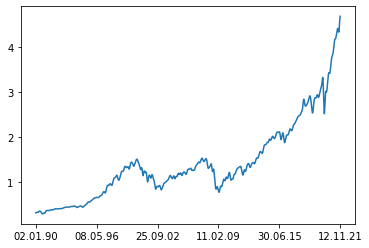

In [80]:
ticks_num=6
plt.plot(tt, deriv[0])
plt.xticks(ticks=get_ticks(xx, ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
plt.show()

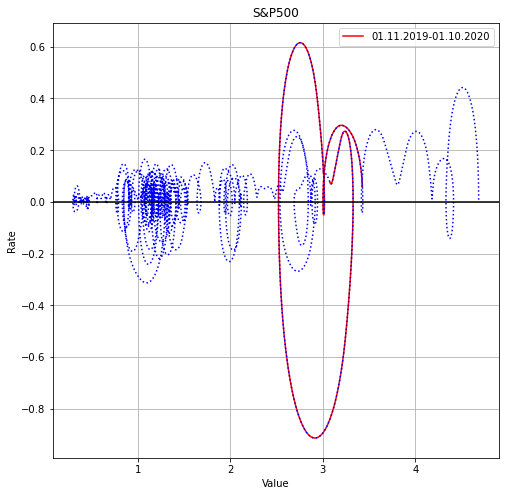

In [58]:
start_date='01.11.2019'
end_date='01.10.2020'
mask = get_mask_tt(x, tt, dates, start_date, end_date)


fig, ax = plt.subplots()
# ax.plot(deriv[0], deriv[1])
ax.plot( deriv[0][mask], deriv[1][mask], '-r', deriv[0], deriv[1], ':b')
# ax.plot(deriv_30[0], deriv_30[1], ':g', deriv_7[0], deriv_7[1], '-.b', deriv_1[0], deriv_1[1], '-r')

plt.title('S&P500')
ax.set_ylabel('Rate')
ax.set_xlabel('Value')

plt.legend([f"{start_date}-{end_date}"], loc='best')

# plt.xlim((deriv[0][mask].min()-0.1, deriv[0][mask].max()+0.2))
plt.grid()
plt.axhline(y=0, color='k', linestyle='-')

fig.set_figheight(8)
fig.set_figwidth(8)
# plt.savefig(f"SnP_t30_Covid.png", dpi=200)
plt.show()

In [8]:
dates

0     1990-01-30
1     1990-03-14
2     1990-04-26
3     1990-06-08
4     1990-07-23
         ...    
263   2021-05-25
264   2021-07-08
265   2021-08-19
266   2021-10-01
267   2021-11-12
Name: date, Length: 268, dtype: datetime64[ns]

In [9]:
x

0        1
1        2
2        3
3        4
4        5
      ... 
263    264
264    265
265    266
266    267
267    268
Length: 268, dtype: int64

In [10]:
mask

array([False, False, False, ..., False, False, False])